# Telecom Customer Churn

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [385]:
#import Dataset
churn_rate = pd.read_csv('C:/Users/Abeen/Downloads/archive (1)/telecom_customer_churn.csv')
zipcode_population = pd.read_csv('C:/Users/Abeen/Downloads/archive (1)/telecom_zipcode_population.csv')

In [386]:
churn_rate.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [387]:
zipcode_population.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [388]:
#Join the Dataframes
churn_df = churn_rate.merge(zipcode_population, how = 'left', on = 'Zip Code')

In [389]:
churn_df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [390]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [391]:
#Display the first five rows of merged Dataframe
pd.set_option('display.max_columns', None)
pd.option_context('mode.use_inf_as_na', True)
churn_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


In [392]:
#Check for missing values
churn_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [393]:
#Check for duplicated values
churn_df.duplicated().sum()

0

In [394]:
#Drop columns with too many missing values
churn_df.drop(columns = ['Churn Category', 'Churn Reason'], inplace = True)

In [395]:
#Fill missing values for numerical columns with mean
churn_df['Avg Monthly Long Distance Charges'].fillna(churn_df['Avg Monthly Long Distance Charges'].mean(), inplace = True)
churn_df['Avg Monthly GB Download'].fillna(churn_df['Avg Monthly GB Download'].mean(), inplace = True)

In [396]:
#Fill missing values for categorical columns with mode
churn_df['Offer'].fillna(churn_df['Offer'].mode()[0], inplace = True)
churn_df['Multiple Lines'].fillna(churn_df['Multiple Lines'].mode()[0], inplace = True)
churn_df['Internet Type'].fillna(churn_df['Internet Type'].mode()[0], inplace = True)
churn_df['Online Security'].fillna(churn_df['Online Security'].mode()[0], inplace = True)
churn_df['Online Backup'].fillna(churn_df['Online Backup'].mode()[0], inplace = True)
churn_df['Device Protection Plan'].fillna(churn_df['Device Protection Plan'].mode()[0], inplace = True)
churn_df['Premium Tech Support'].fillna(churn_df['Premium Tech Support'].mode()[0], inplace = True)
churn_df['Streaming TV'].fillna(churn_df['Streaming TV'].mode()[0], inplace = True)
churn_df['Streaming Music'].fillna(churn_df['Streaming Music'].mode()[0], inplace = True)
churn_df['Streaming Movies'].fillna(churn_df['Streaming Movies'].mode()[0], inplace = True)
churn_df['Unlimited Data'].fillna(churn_df['Unlimited Data'].mode()[0], inplace = True)

In [397]:
#Verify data cleaning
churn_df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [398]:
# Identify negative values
negative_charges = churn_df[churn_df['Monthly Charge'] < 0]
print(negative_charges)

     Customer ID  Gender  Age Married  Number of Dependents           City  \
1     0003-MKNFE    Male   46      No                     0       Glendale   
32    0052-DCKON    Male   28     Yes                     0    Los Angeles   
170   0274-JKUJR    Male   21     Yes                     2    Los Angeles   
232   0361-HJRDX  Female   38      No                     0   Sherman Oaks   
336   0495-ZBNGW    Male   78     Yes                     0       Loma Mar   
...          ...     ...  ...     ...                   ...            ...   
6894  9793-WECQC    Male   53      No                     0     Foresthill   
6918  9821-BESNZ    Male   43      No                     0     Northridge   
6976  9898-KZQDZ  Female   65     Yes                     0     Lee Vining   
7020  9961-JBNMK    Male   79      No                     0  Desert Center   
7027  9971-ZWPBF    Male   70     Yes                     1         Orinda   

      Zip Code   Latitude   Longitude  Number of Referrals  Ten

In [399]:
# Calculate the mean of positive monthly charges
mean_charge = churn_df[churn_df['Monthly Charge'] > 0]['Monthly Charge'].mean()
print(f'Mean Monthly Charge (for positive values): {mean_charge}')

Mean Monthly Charge (for positive values): 64.79236602628917


In [400]:
# Replace negative values with the mean
churn_df.loc[churn_df['Monthly Charge'] < 0, 'Monthly Charge'] = mean_charge

In [401]:
churn_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,Offer B,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600000,593.30,0.00,0,381.51,974.81,Stayed,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,Offer B,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,64.792366,542.40,38.33,10,96.21,610.28,Stayed,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,280.85,0.00,0,134.60,415.45,Churned,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.85,0.00,0,361.66,1599.51,Churned,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,Offer B,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,267.40,0.00,0,22.14,289.54,Churned,42853


In [402]:
# Assuming 'Customer Status' indicates whether the customer has churned or not
churn_df['Churn'] = churn_df['Customer Status'].apply(lambda x: 1 if x in 'Churned' else 0)

# Drop columns that won't be used for prediction
churn_df.drop(columns=['Customer ID', 'Customer Status'], inplace=True)

In [403]:
churn_df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population,Churn
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,Offer B,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600000,593.30,0.00,0,381.51,974.81,4498,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,Offer B,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,64.792366,542.40,38.33,10,96.21,610.28,31297,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,280.85,0.00,0,134.60,415.45,62069,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.85,0.00,0,361.66,1599.51,46677,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,Offer B,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,267.40,0.00,0,22.14,289.54,42853,1


## 1. Churn Distribution
- **Insight**: A significant portion of customers do not churn (label 0), while a smaller but notable portion does (label 1).
- **Conclusion**: While the majority of customers are retained, churn prevention strategies should be implemented to reduce the number of customers leaving.

Churn Rate: 26.54%


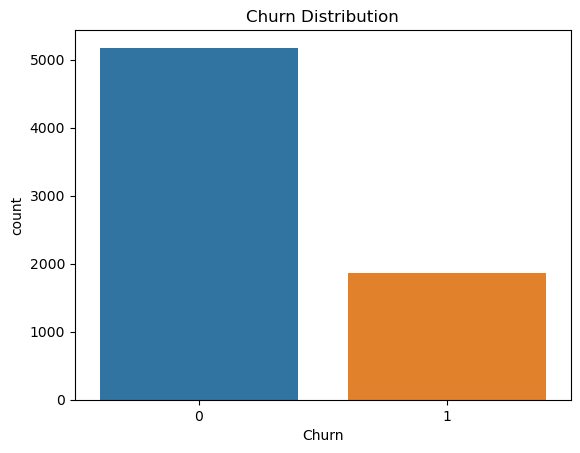

In [404]:
# Calculate churn rate
churn_rates = churn_df['Churn'].mean() * 100
print(f'Churn Rate: {churn_rates:.2f}%')

# Visualize churn rate
sns.countplot(x='Churn', data=churn_df)
plt.title('Churn Distribution')
plt.show()

## 2. Customer Lifetime Value Distribution
- **Insight**: The majority of customers have a lower lifetime value, with a steep drop as the lifetime value increases. A few customers have very high lifetime values.
- **Conclusion**: Efforts to increase customer retention and upsell services might significantly boost the overall customer lifetime value.

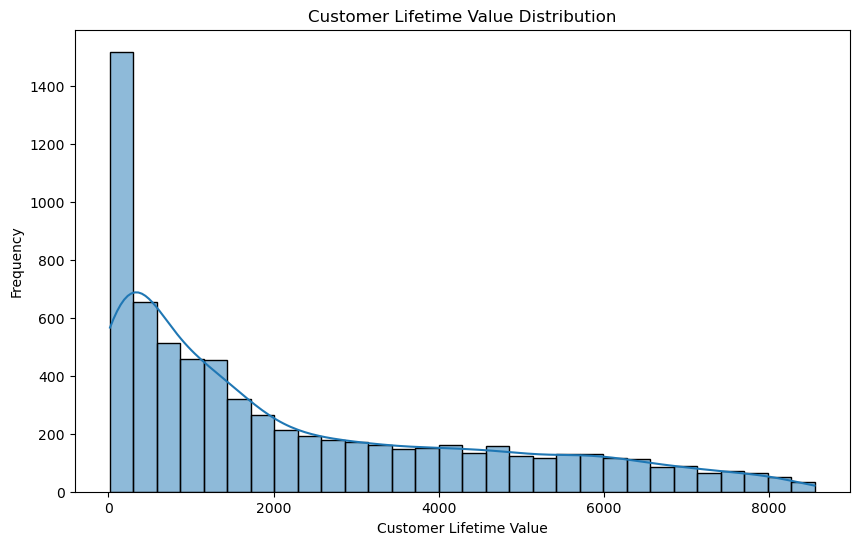

In [405]:
# Calculate CLV
churn_df['CLV'] = churn_df['Monthly Charge'] * churn_df['Tenure in Months']

# Visualize CLV distribution
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

## 3. Monthly Charges Distribution
- **Insight**: Monthly charges have a diverse range with peaks around 20, 50, and 80, indicating varied customer segments.
- **Conclusion**: Pricing strategies could be optimized to cater to different segments, ensuring that price-sensitive customers are not alienated.

Average Monthly Charge: $64.79


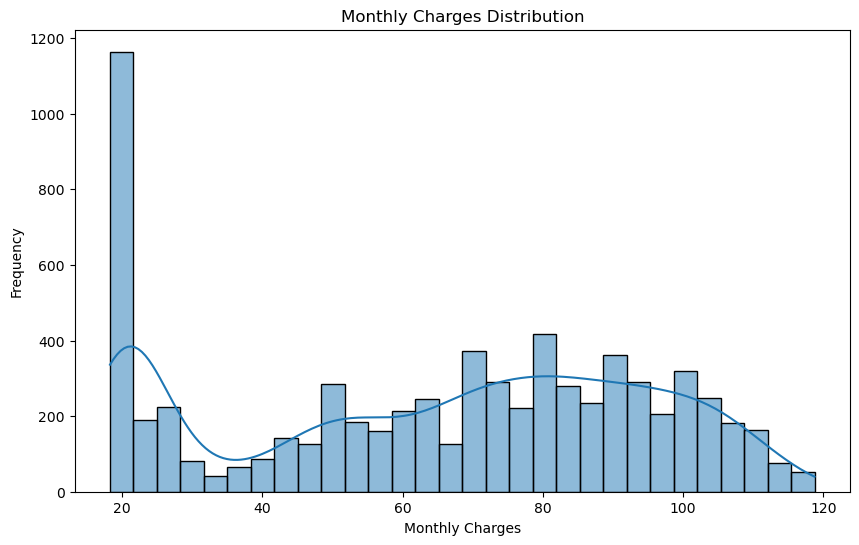

In [406]:
# Calculate and visualize average monthly charges
avg_monthly_charge = churn_df['Monthly Charge'].mean()
print(f'Average Monthly Charge: ${avg_monthly_charge:.2f}')

plt.figure(figsize=(10, 6))
sns.histplot(churn_df['Monthly Charge'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

## 4. Tenure in Months Distribution
- **Insight**: There is a relatively uniform distribution of customer tenure with a peak at the high end (around 70 months).
- **Conclusion**: A substantial number of long-term customers might indicate good service satisfaction, but efforts should be made to convert shorter-tenured customers into long-term ones.

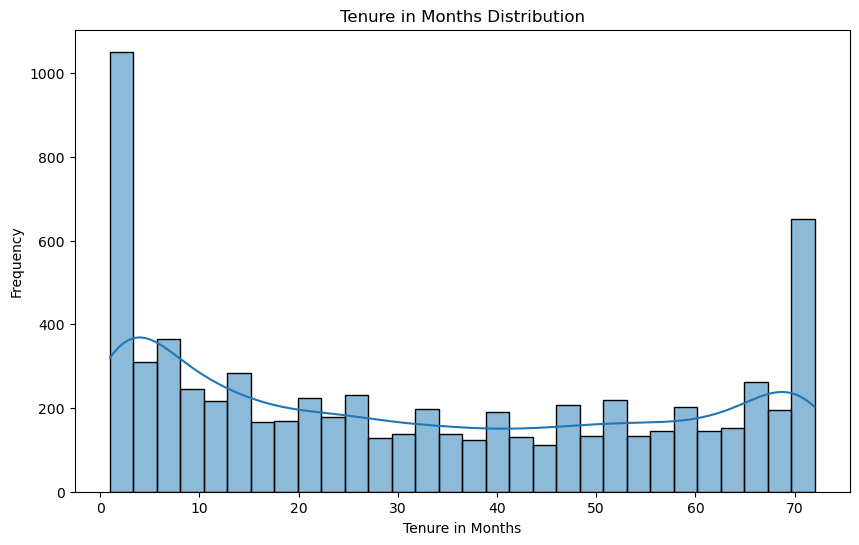

In [407]:
# Visualize tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['Tenure in Months'], bins=30, kde=True)
plt.title('Tenure in Months Distribution')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.show()

## 5. Internet Type Distribution
- **Insight**: Fiber Optic is the most common internet type, followed by DSL and then Cable.
- **Conclusion**: Emphasis on maintaining and expanding fiber optic services could be beneficial, given its popularity.

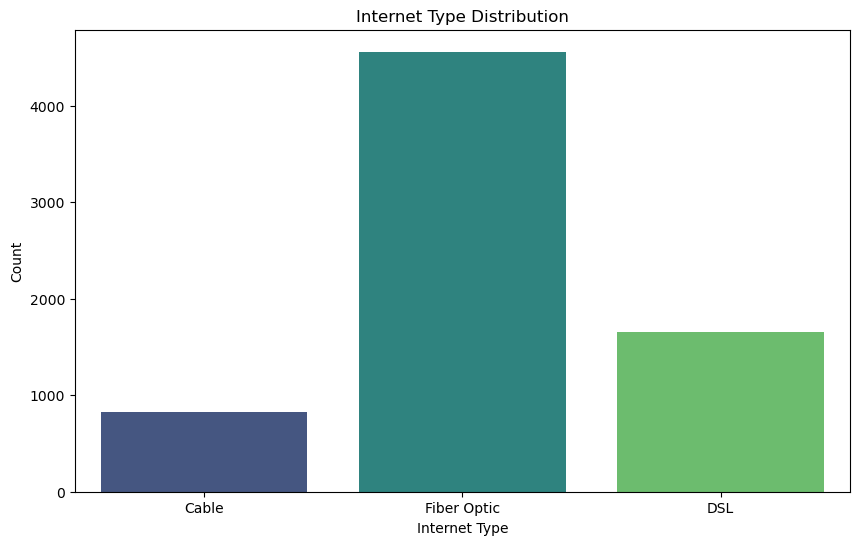

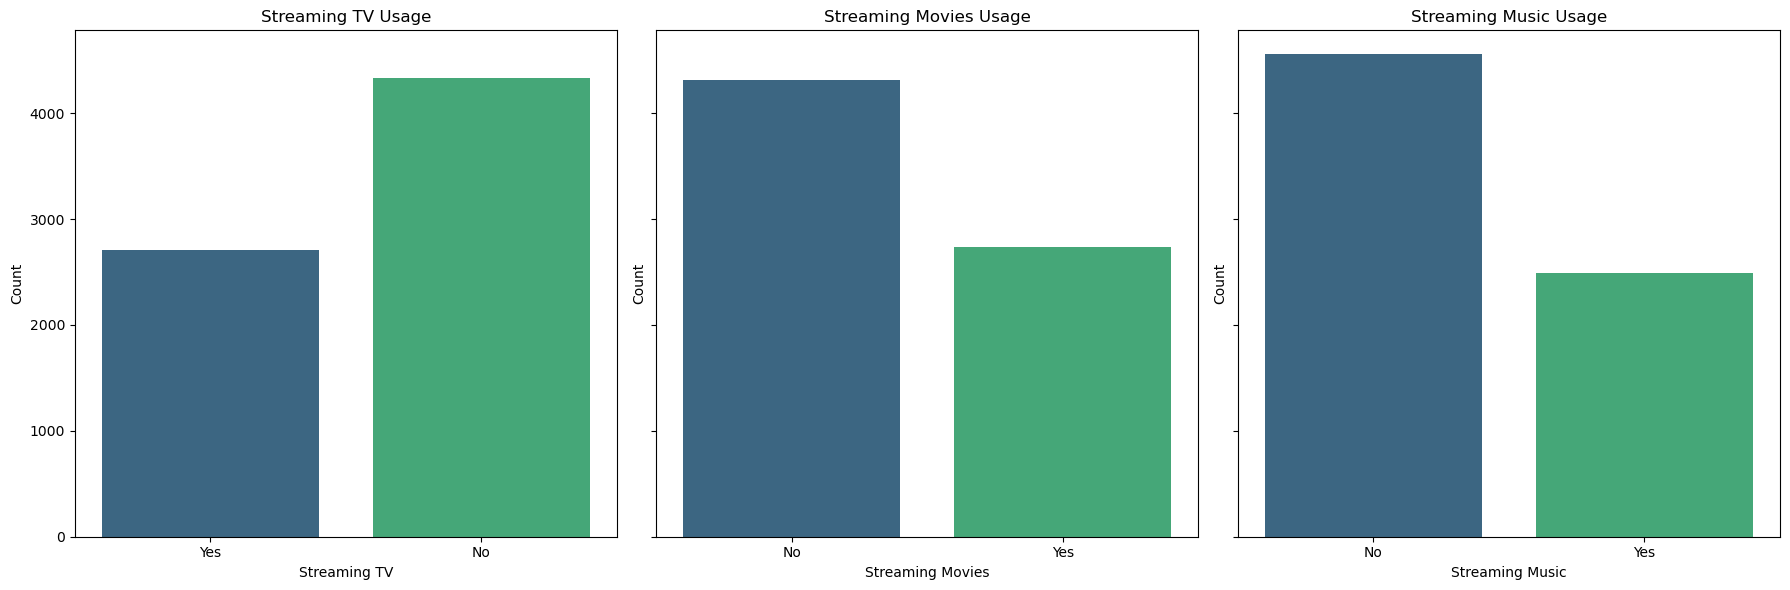

In [408]:
# Internet Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Internet Type', data=churn_df, palette='viridis')
plt.title('Internet Type Distribution')
plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.show()

## 6. Streaming Services Usage

#### Streaming TV
- **Insight**: More customers do not use streaming TV compared to those who do.
- **Conclusion**: There is potential for growth in the streaming TV market by creating more attractive streaming packages or partnerships.

#### Streaming Movies
- **Insight**: More customers do not use streaming movies compared to those who do.
- **Conclusion**: Similar to streaming TV, there is an opportunity to increase streaming movie usage among customers.

#### Streaming Music
- **Insight**: A larger number of customers do not use streaming music services.
- **Conclusion**: Offering bundled packages with streaming music or promotional offers could drive higher adoption.

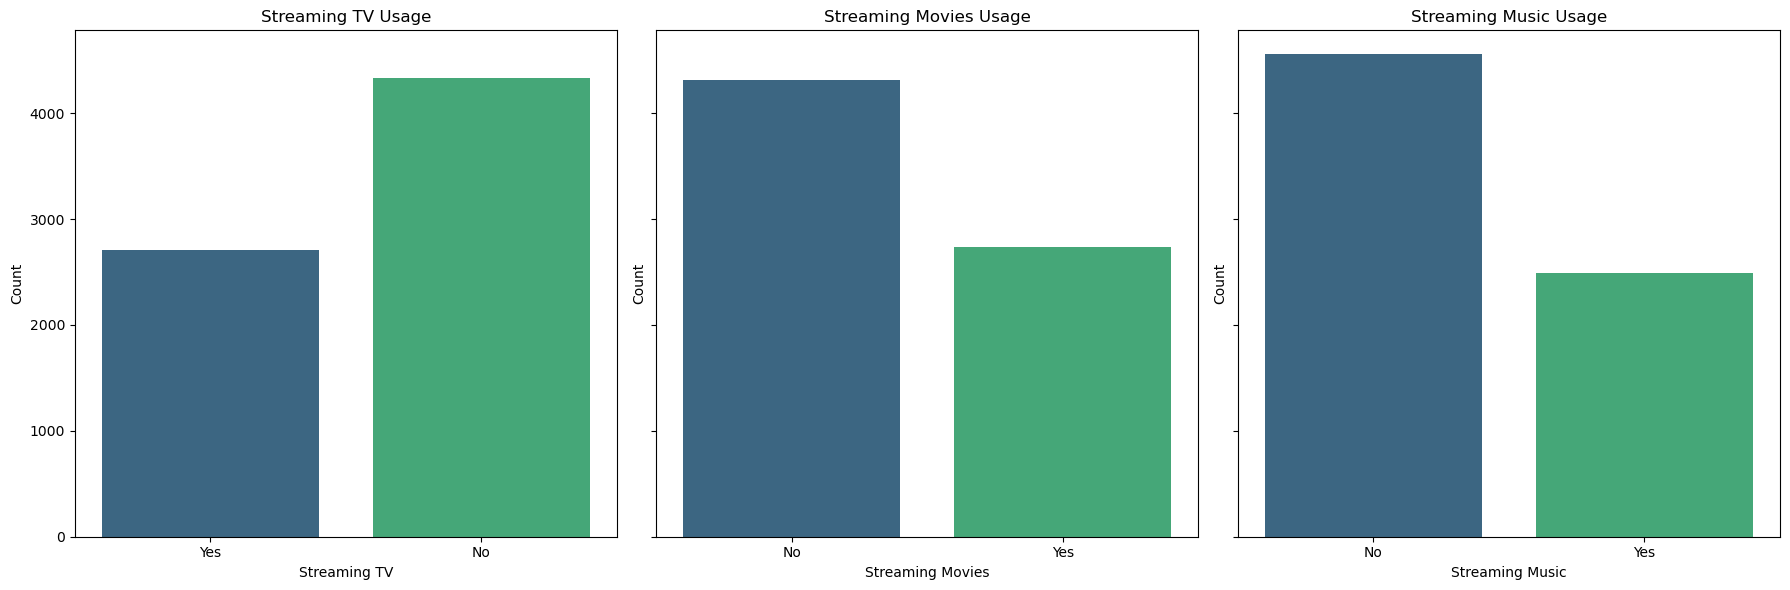

In [415]:
# Streaming Services Usage
streaming_services = ['Streaming TV', 'Streaming Movies', 'Streaming Music']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, service in enumerate(streaming_services):
    sns.countplot(x=service, data=churn_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{service} Usage')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 7. Age Distribution
- **Insight**: The age distribution of customers is quite varied, with a noticeable number of customers in their 20s and a steady count up to around 80 years old.
- **Conclusion**: Services should be tailored to meet the needs of a wide age range, from tech-savvy young adults to older customers.

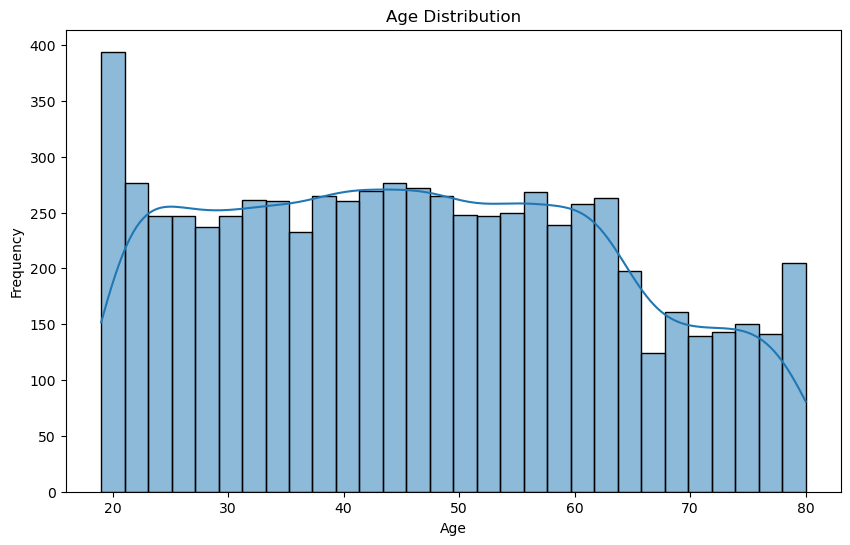

In [417]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 8. Gender Distribution
- **Insight**: The gender distribution is almost equal between males and females.
- **Conclusion**: Marketing and service offerings should be gender-neutral and inclusive, as the customer base is evenly split.

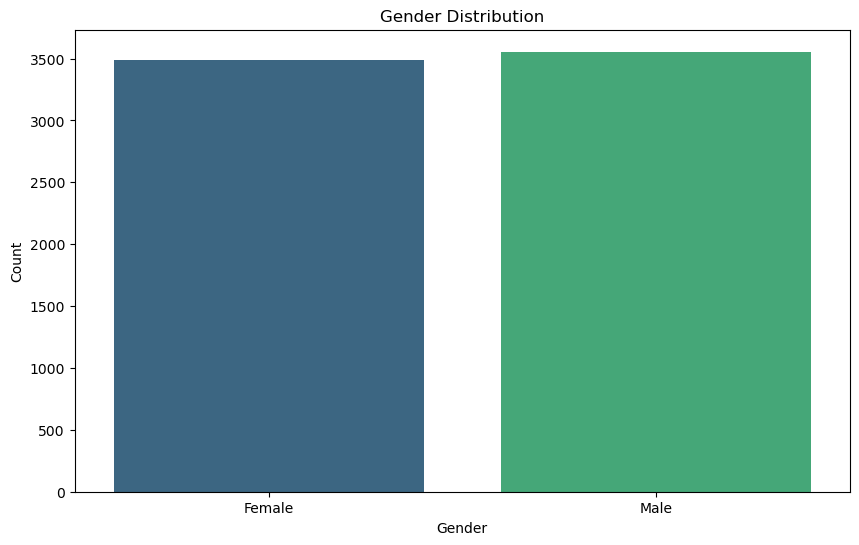

In [418]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=churn_df, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 9. Marital Status Distribution
- **Insight**: The distribution between married and non-married customers is nearly equal.
- **Conclusion**: Marketing strategies should not heavily rely on marital status as a key differentiator.

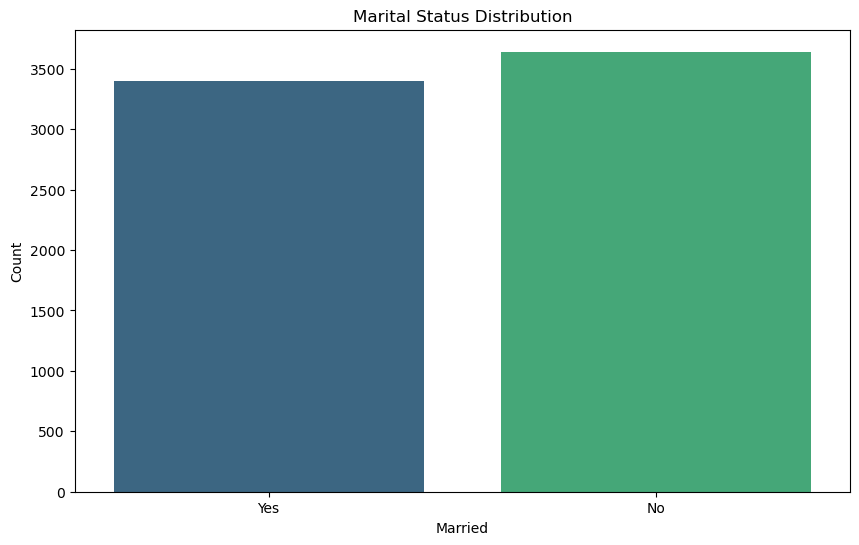

In [419]:
# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=churn_df, palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

## Overall Conclusion
The data provides a comprehensive view of the customer base in the telecom domain. Efforts to increase customer lifetime value, reduce churn, and promote streaming services could significantly impact business performance. Additionally, the diverse age distribution and even gender split suggest that marketing strategies should be broad and inclusive to cater to the entire customer spectrum.